<div style="border-radius:0px; border:#112241 solid; padding: 15px; background-color: chetwode; font-size:100%; text-align:center">
<center> <h1> Introduction </h1>
    <h3><a href="https://www.kaggle.com/datasets/akhiljethwa/global-electricity-statistics">"Global Electricity Statistics (1980-2021)"</a></h3><hr>

<center><div style="border-radius:0px; border:3eb489 ; padding: 12px; font-size:110%; text-align:center">This dataset contains the Yearly data from 1980 to 2021 on world electricity statistics. The dataset has total of 4 features and details of each feature is given below <br>(All the information is in the billion kWh and million kW).


In [210]:
# For Data Analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For Data Visualization
import plotly.express as px
import plotly.io as pio

# Addidtional Imports
from termcolor import colored
import country_converter as coco
import datetime
import calendar

In [211]:
# Set Plotly Template
pio.templates.default = "plotly_dark"

# If you want to explore more templates replace plotly with ['ggplot2', 'seaborn', 'simple_white', 'plotly',
#                                                             'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
#                                                             'ygridoff', 'gridon', 'none']

In [212]:
data = pd.read_csv('../datasets/global_electricity_stats.csv')
data.head()

,Country,Features,Region,1980,1981,1982,1983,1984,1985,1986,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Algeria,net generation,Africa,6.683,7.65,8.824,9.615,10.537,11.569,12.214,...,53.9845,56.3134,60.39972,64.68244,66.75504,71.49546,72.10903,76.685,72.73591277,77.53072719
1,Angola,net generation,Africa,0.905,0.906,0.995,1.028,1.028,1.028,1.088,...,6.03408,7.97606,9.21666,9.30914,10.203511,10.67604,12.83194,15.4,16.6,16.429392
2,Benin,net generation,Africa,0.005,0.005,0.005,0.005,0.005,0.005,0.005,...,0.04612,0.08848,0.22666,0.31056,0.26004,0.3115,0.19028,0.2017,0.22608,0.24109728
3,Botswana,net generation,Africa,0.443,0.502,0.489,0.434,0.445,0.456,0.538,...,0.33,0.86868,2.17628,2.79104,2.52984,2.8438,2.97076,3.0469,2.05144,2.18234816
4,Burkina Faso,net generation,Africa,0.098,0.108,0.115,0.117,0.113,0.115,0.122,...,0.86834,0.98268,1.11808,1.43986,1.5509,1.64602,1.6464,1.72552,1.647133174,1.761209666


In [213]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 45 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Country   1610 non-null   object
 1   Features  1610 non-null   object
 2   Region    1610 non-null   object
 3   1980      1582 non-null   object
 4   1981      1582 non-null   object
 5   1982      1582 non-null   object
 6   1983      1582 non-null   object
 7   1984      1582 non-null   object
 8   1985      1582 non-null   object
 9   1986      1582 non-null   object
 10  1987      1582 non-null   object
 11  1988      1582 non-null   object
 12  1989      1582 non-null   object
 13  1990      1582 non-null   object
 14  1991      1582 non-null   object
 15  1992      1582 non-null   object
 16  1993      1582 non-null   object
 17  1994      1582 non-null   object
 18  1995      1582 non-null   object
 19  1996      1582 non-null   object
 20  1997      1582 non-null   object
 21  1998      1582

As we can see all the values are in Object datatype so we have to convert them into float, but first I am going to filter the only Net generation values of year 2021.

In [214]:
generation = data[(data['Features'] == 'net generation')]
generation.head()

,Country,Features,Region,1980,1981,1982,1983,1984,1985,1986,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Algeria,net generation,Africa,6.683,7.65,8.824,9.615,10.537,11.569,12.214,...,53.9845,56.3134,60.39972,64.68244,66.75504,71.49546,72.10903,76.685,72.73591277,77.53072719
1,Angola,net generation,Africa,0.905,0.906,0.995,1.028,1.028,1.028,1.088,...,6.03408,7.97606,9.21666,9.30914,10.203511,10.67604,12.83194,15.4,16.6,16.429392
2,Benin,net generation,Africa,0.005,0.005,0.005,0.005,0.005,0.005,0.005,...,0.04612,0.08848,0.22666,0.31056,0.26004,0.3115,0.19028,0.2017,0.22608,0.24109728
3,Botswana,net generation,Africa,0.443,0.502,0.489,0.434,0.445,0.456,0.538,...,0.33,0.86868,2.17628,2.79104,2.52984,2.8438,2.97076,3.0469,2.05144,2.18234816
4,Burkina Faso,net generation,Africa,0.098,0.108,0.115,0.117,0.113,0.115,0.122,...,0.86834,0.98268,1.11808,1.43986,1.5509,1.64602,1.6464,1.72552,1.647133174,1.761209666


In [215]:
plot = generation.filter(['Country', '2021'], axis=1)
plot2 = plot.rename(columns={'2021':'Net_Generation'})
plot2.head()

,Country,Net_Generation
0,Algeria,77.53072719
1,Angola,16.429392
2,Benin,0.24109728
3,Botswana,2.18234816
4,Burkina Faso,1.761209666


Now I am going to remove some of the non-usable values that have 'ie' or '--' in the field.

In [216]:
plot2 = plot2[~plot2["Net_Generation"].str.contains("ie", na=False)]
plot2 = plot2[~plot2["Net_Generation"].str.contains("--", na=False)]
plot2.head()

,Country,Net_Generation
0,Algeria,77.53072719
1,Angola,16.429392
2,Benin,0.24109728
3,Botswana,2.18234816
4,Burkina Faso,1.761209666


Finally, converting all the values into float datatype

In [217]:
plot2['Net_Generation'] = plot2['Net_Generation'].astype(float)
plot2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 218 entries, 0 to 229
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         218 non-null    object 
 1   Net_Generation  215 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.1+ KB


<div style="border-radius: 10px; background-color: #192538">
    <h1 style="color: white; padding: 1rem">Some examples of Interactive Maps</h1>
</div>

In [218]:
%%capture --no-display
standard_names = coco.convert(names = plot2['Country'], to='name_short')
plot2.head()

country = coco.convert(names = plot2['Country'], to = "ISO3")
plot2['Country'] = country
plot2.head()

fig = px.choropleth(locations = plot2.Country,
                    color = plot2.Net_Generation,
                    range_color=(0, 1500),
                    color_continuous_scale = [[0, '#0d0887'],
                      [0.01, '#46039f'],
                      [0.03, '#7201a8'],
                      [0.5, '#9c179e'],
                      [0.7, '#bd3786'],
                      [0.9, '#d8576b'],
                      [1, '#ed7953']
                     ],
                    #  focus='south america',
                    title = 'Global Electricity Generation in 2021')
fig.update_layout(height=500, width=800)
fig.show()

Same can be sone with Consumption data.

In [219]:
%%capture --no-display
consumption = data[(data['Features'] == 'net consumption')]

plot = consumption.filter(['Country', '2021'], axis=1)
plot2 = plot.rename(columns={'2021':'Net_Consumption'})

plot2 = plot2[~plot2["Net_Consumption"].str.contains("ie", na=False)]
plot2 = plot2[~plot2["Net_Consumption"].str.contains("--", na=False)]
plot2['Net_Consumption'] = plot2['Net_Consumption'].astype(float)

standard_names = coco.convert(names = plot2['Country'], to='name_short')
plot2.head()

country = coco.convert(names = plot2['Country'], to = "ISO3")
plot2['Country'] = country
plot2.head()

fig = px.choropleth(locations = plot2.Country,
                    color = plot2.Net_Consumption,
                    range_color=(0, 1500),
                    color_continuous_scale = [[0, '#0d0887'],
                      [0.01, '#46039f'],
                      [0.03, '#7201a8'],
                      [0.5, '#9c179e'],
                      [0.7, '#bd3786'],
                      [0.9, '#d8576b'],
                      [1, '#ed7953']
                     ],
                    #  focus='south america',
                    title = 'Global Electricity Consumption in 2021')
fig.update_layout(height=500, width=800)
fig.show()

C:\Users\judah\AppData\Local\Temp\ipykernel_17256\3158714275.py:26: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




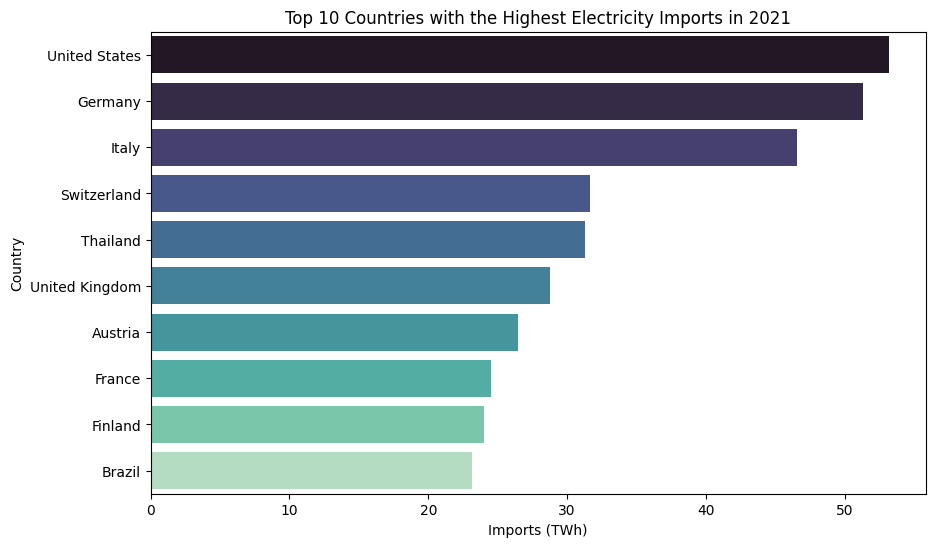

In [220]:
# Filtering the data for 'imports' and 'exports' for the year 2021
imports_data = data[(data['Features'] == 'imports')]
exports_data = data[(data['Features'] == 'exports')]

# Filtering and renaming columns for both imports and exports
plot_imports = imports_data[['Country', '2021']].rename(columns={'2021': 'Imports'})
plot_exports = exports_data[['Country', '2021']].rename(columns={'2021': 'Exports'})

# Cleaning data by removing rows with non-numeric values in 'Imports' and 'Exports' columns
plot_imports = plot_imports[~plot_imports["Imports"].str.contains("ie", na=False)]
plot_imports = plot_imports[~plot_imports["Imports"].str.contains("--", na=False)]
plot_exports = plot_exports[~plot_exports["Exports"].str.contains("ie", na=False)]
plot_exports = plot_exports[~plot_exports["Exports"].str.contains("--", na=False)]

# Converting the 'Imports' and 'Exports' columns to float
plot_imports['Imports'] = plot_imports['Imports'].astype(float)
plot_exports['Exports'] = plot_exports['Exports'].astype(float)

# Finding top 10 countries with highest electricity imports
top_imports = plot_imports.sort_values(by='Imports', ascending=False).head(10)

top_imports

# Plotting the top 10 countries with highest electricity imports
plt.figure(figsize=(10, 6))
sns.barplot(x='Imports', y='Country', data=top_imports, palette="mako")
plt.title('Top 10 Countries with the Highest Electricity Imports in 2021')
plt.xlabel('Imports (TWh)')
plt.ylabel('Country')
plt.show()


The energy need for a country or region can be understood as the total amount of energy required to meet its consumption demands. It is not a straightforward calculation because it can involve several factors, including energy production, imports and exports, and losses during transmission and distribution. Here's a simplified formula we used to calculate the "energy need":

```
Energy Need = Net Consumption + Distribution Losses + Exports − Net Generation − Net Import
```

Here's what each term represents:

- **Net Consumption (billion kWh):** The total electricity consumed by end-users.
- **Distribution Losses (billion kWh):** The energy lost during transmission from power plants to consumers.
- **Exports (billion kWh):** The total electricity exported minus the electricity imported. It's a net figure because you subtract any imports from the exports to see the overall export balance. If this number is negative, the country is a net importer.
- **Net Generation (billion kWh):** The total electricity generated by power plants.
- **Net Imports (billion kWh):** The total electricity imported minus the electricity exported. It's a net figure because you subtract any exports from the imports to see the overall import balance. If this number is negative, the country is a net exporter.



C:\Users\judah\AppData\Local\Temp\ipykernel_17256\3869645105.py:2: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



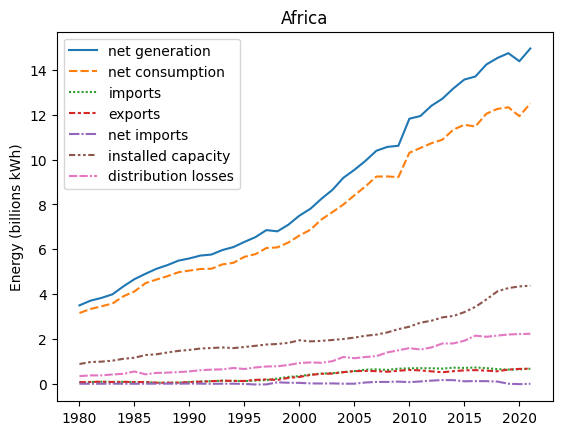

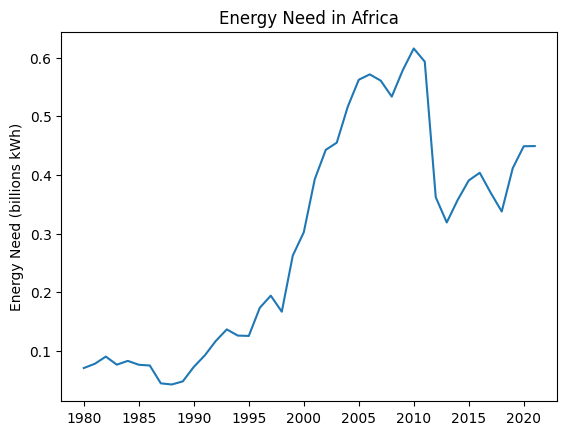

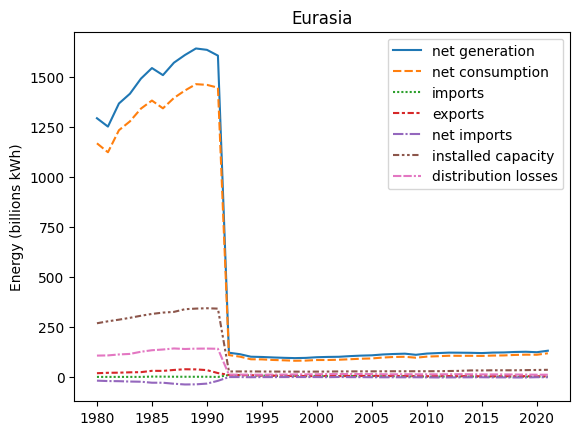

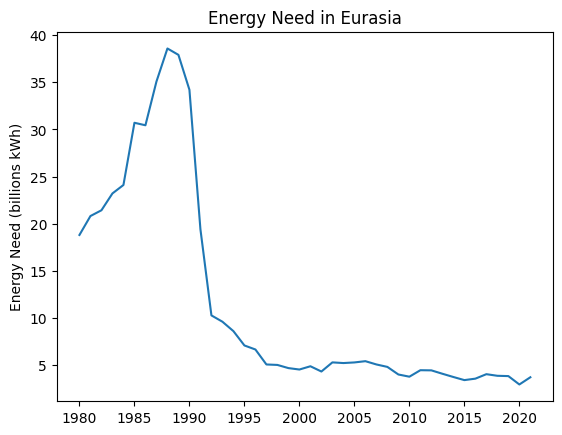

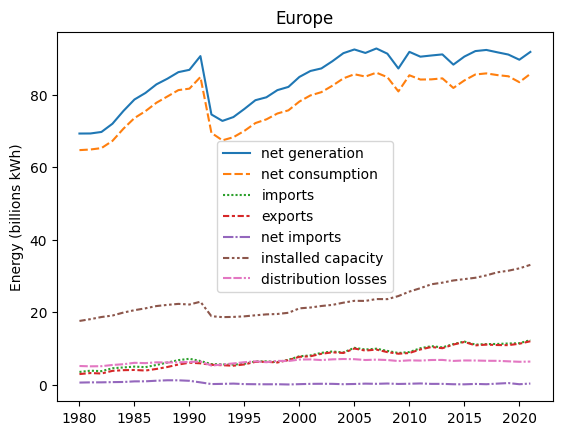

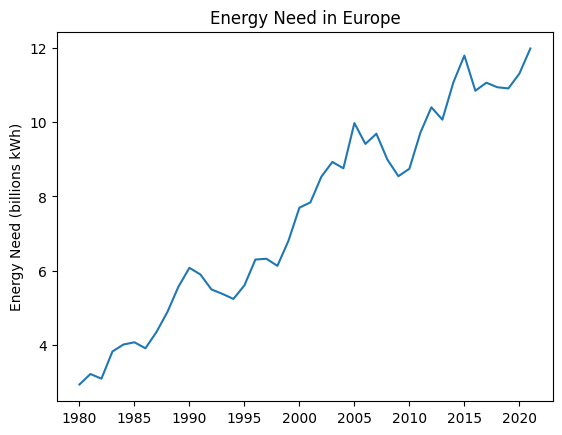

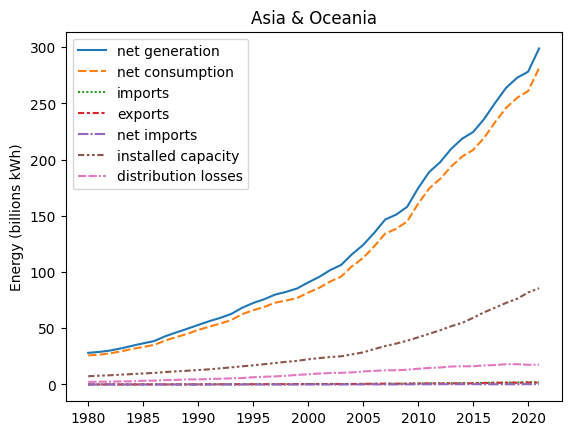

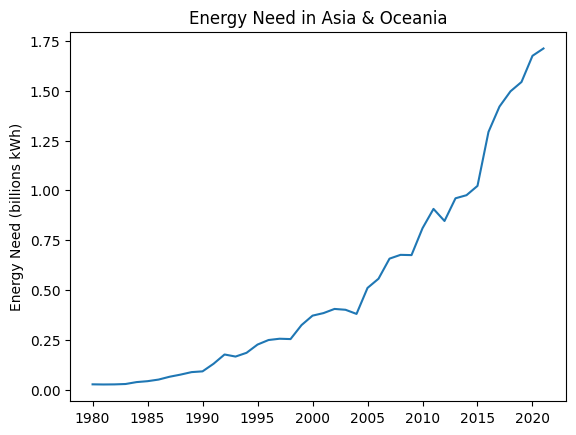

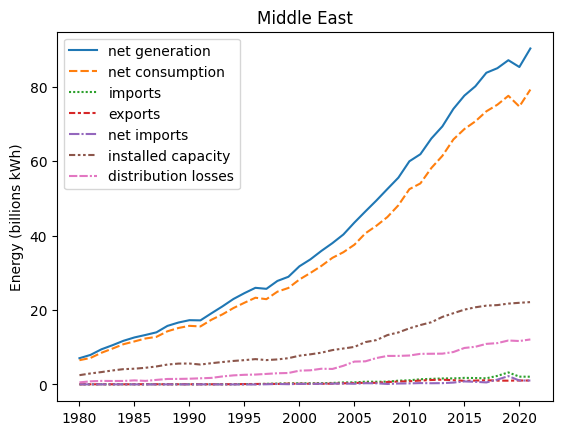

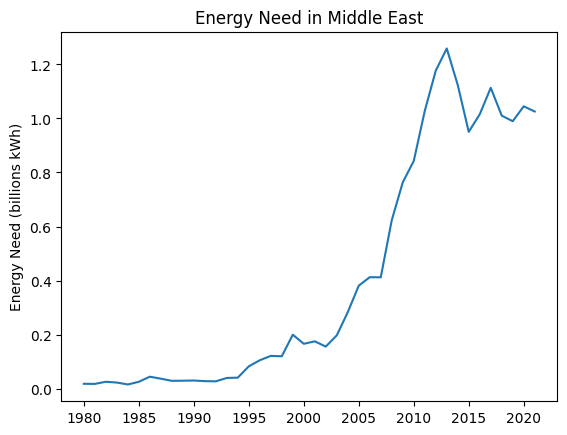

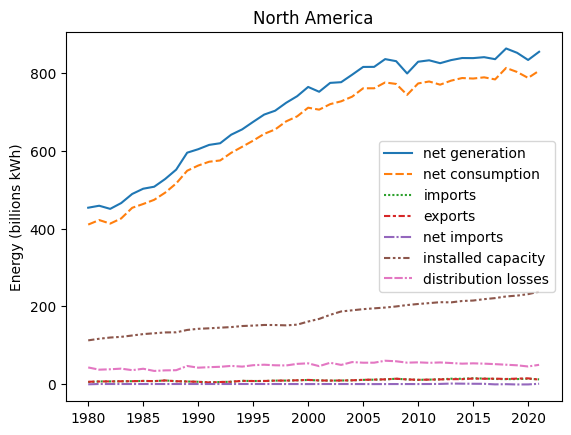

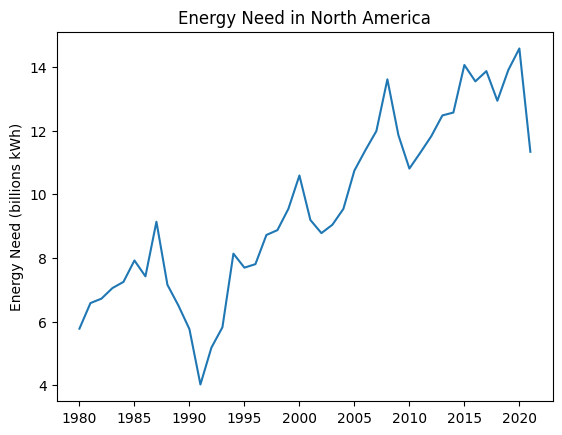

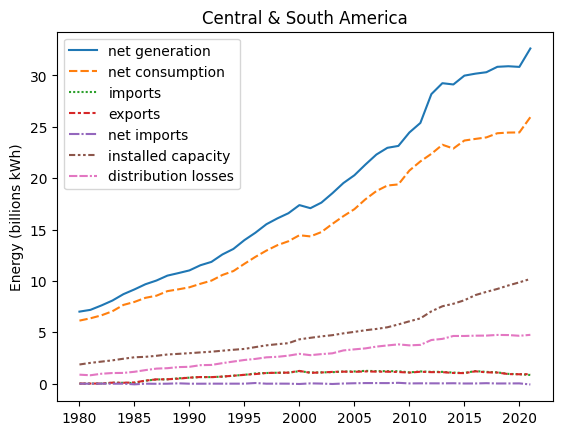

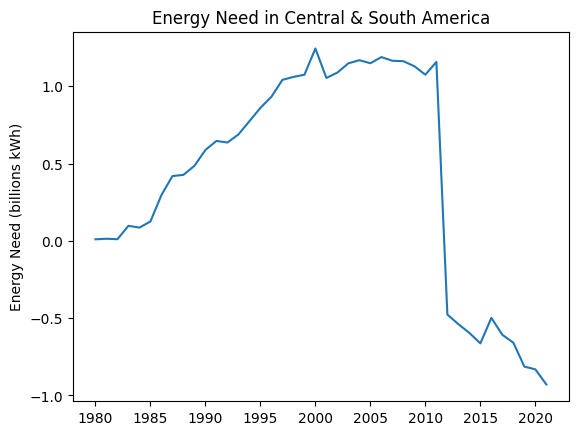

In [221]:

data = data.dropna()
data = data[data.applymap(lambda x: x != '--')]

regions = data['Region'].unique()
years = [str(year) for year in range(1980, 2022)]
features = data['Features'].unique()
region_dataframes = {}

for region in regions:
    # Create a DataFrame to store the mean values for each feature and year
    means_data = pd.DataFrame(index=features, columns=years)

    region_data = data[data['Region'] == region]
    region_data = region_data.drop(['Region', 'Country'], axis=1)

    for feature in features:
        region_feature = region_data[region_data["Features"] == feature]
        region_feature = region_feature.drop(['Features'], axis=1)

        for year in years:
            # Convert the year column to numeric
            region_feature[year] = pd.to_numeric(region_feature[year], errors='coerce')

            # Calculate the mean
            mean = region_feature[year].mean()

            # Store the mean in the means_data DataFrame
            means_data.at[feature, year] = mean

    # Store the means_data DataFrame in the region_dataframes dictionary
    region_dataframes[region] = means_data.T

for region in region_dataframes:
    region_dataframes[region]
    plt.title(region)
    plt.xticks(range(0, len(region_dataframes[region].index), 5))
    plt.ylabel('Energy (billions kWh)')
    sns.lineplot(data=region_dataframes[region])
    plt.show()

    df = region_dataframes[region]
    
    # Ensure all columns are in numeric form
    for col in ['net consumption', 'distribution losses', 'net generation', 'net imports']:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # Calculate energy need
    df['energy need'] = df['net consumption'] + df['distribution losses'] + df['exports'] - df['net generation'] - df['net imports']
    
    # Fill NaN values in 'energy need' with zeros if that's the desired behavior
    df['energy need'] = df['energy need'].fillna(0)

    # Update the DataFrame in the dictionary
    region_dataframes[region] = df

    plt.title(f"Energy Need in {region}")
    plt.ylabel('Energy Need (billions kWh)')
    plt.xticks(range(0, len(region_dataframes[region].index), 5))
    sns.lineplot(data=df['energy need'])
    plt.show()


C:\Users\judah\AppData\Local\Temp\ipykernel_17256\2440219633.py:37: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




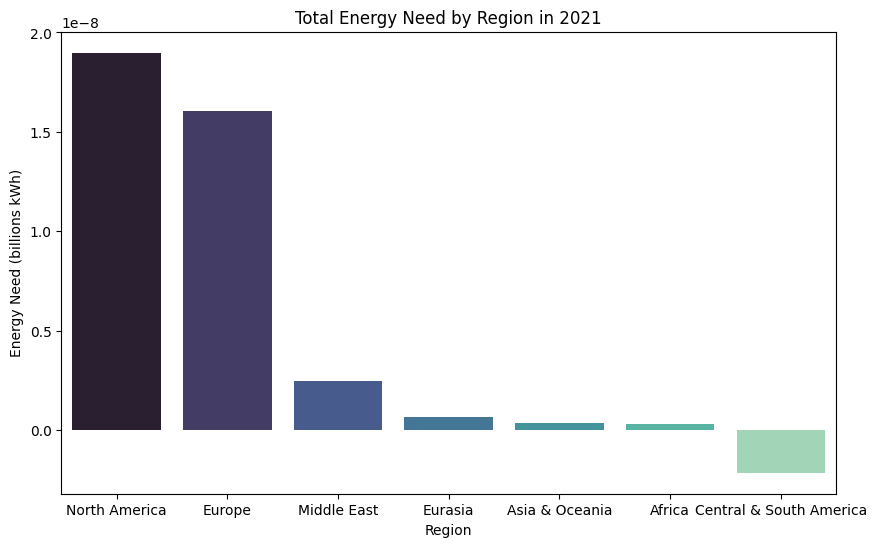

In [222]:
# Top energy needs by region bar chart

# Create a DataFrame to store the total energy need for each region
energy_need_data = pd.DataFrame(index=regions, columns=['total energy need'])

# https://ourworldindata.org/grapher/population-regions-with-projections?tab=table
population_data = pd.read_csv('../datasets/population_by_region.csv', index_col='Entity')

# Filter the population data for the year 2021
population_2021 = population_data[population_data['Year'] == 2021]

# Create a DataFrame to store the total energy need for each region
energy_need_data = pd.DataFrame(index=regions, columns=['total energy need'])

for region in regions:
    # Calculate the total energy need for the region for 2021
    total_energy_need = region_dataframes[region].loc['2021', 'energy need']

    # Adjust for population
    if region == 'Asia & Oceania':
        total_energy_need /= (population_2021.loc['Asia', 'Population'] + population_2021.loc['Oceania', 'Population'])
    elif region == 'Middle East':
        # https://worldpopulationreview.com/continents/the-middle-east-population#:~:text=With%20a%20population%20of%20over,countries%20located%20in%20this%20region.
        total_energy_need /= 411000000  # Middle East population for 2021
    elif region == 'Eurasia':
        total_energy_need /= (population_2021.loc['Europe', 'Population'] + population_2021.loc['Asia', 'Population'])
    else:
        total_energy_need /= population_2021.loc[region, 'Population']

    # Store the total energy need in the DataFrame
    energy_need_data.at[region, 'total energy need'] = total_energy_need

# Sort and plot the data
energy_need_data = energy_need_data.sort_values(by='total energy need', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=energy_need_data.index, y='total energy need', data=energy_need_data, palette="mako")
plt.title('Total Energy Need by Region in 2021')
plt.xlabel('Region')
plt.ylabel('Energy Need (billions kWh)')
plt.show()


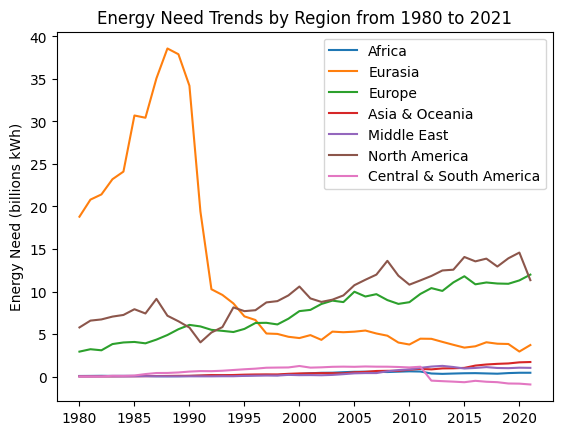

In [223]:
# Energy Need Trends by Region from 1980 to 2021

for region in region_dataframes:
    df = region_dataframes[region]
    
    # Ensure all columns are in numeric form
    for col in ['net consumption', 'distribution losses', 'net generation', 'net imports']:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # Calculate energy need
    df['energy need'] = df['net consumption'] + df['distribution losses'] + df['exports'] - df['net generation'] - df['net imports']
    
    # Fill NaN values in 'energy need' with zeros if that's the desired behavior
    df['energy need'] = df['energy need'].fillna(0)

    # Update the DataFrame in the dictionary
    region_dataframes[region] = df

    plt.ylabel('Energy Need (billions kWh)')
    plt.xticks(range(0, len(region_dataframes[region].index), 5))
    sns.lineplot(data=df['energy need'], label=region)
    
    
plt.title("Energy Need Trends by Region from 1980 to 2021")
plt.show()